In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
ct = np.linspace(-55,55.,12)
%matplotlib inline

import pyqg

In [3]:
# the model object
year = 1.
U0 = -.01
dt = 0.001
nmax = 1000  # of timesteps

m = pyqg.BTModel(L=2.*pi,nx=256, tmax = nmax*dt,
        beta = 0., U = U0, H = 1., rek = 0., rd = None, dt = 0.001,
                taveint=year, ntd=4)

# Initial condition: the lamb dipole
The lamb dipole is an exact solution to the NS equation. If our numerical scheme is accurate enough, the initial condition shouldn't move relative to a frame moving with the dipole (hence the trick of using -U0 as background velocity). 

In [4]:
N = m.nx
R = 1.5
E0 = .5
U = -m.U

import scipy.special as special

x, y = m.x, m.y
x0,y0 = x[N/2,N/2],y[N/2,N/2]

r = np.sqrt( (x-x0)**2 + (y-y0)**2 )
s = np.zeros(r.shape)

for i in range(N):
    for j in range(N):
        if r[i,j] == 0.:
            s[i,j] = 0.
        else:
            s[i,j] = (y[i,j]-y0)/r[i,j]

lam = (pi*1.2197)/R

# Lamb's
C = (-2.*U*lam)/(special.j0(lam*R))
qi = np.zeros_like(r)
qi[r<=R] = C*special.j1(lam*r[r<R])*s[r<R]

In [7]:
m.set_q(qi[np.newaxis])

<matplotlib.colorbar.Colorbar instance at 0x10938bf38>

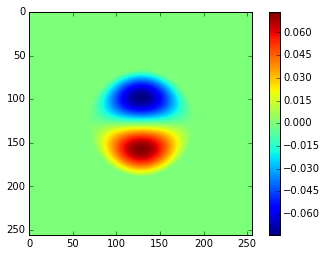

In [9]:
plt.imshow(m.q[0])
plt.colorbar()

In [10]:
m.run()

<matplotlib.colorbar.Colorbar instance at 0x109c78050>

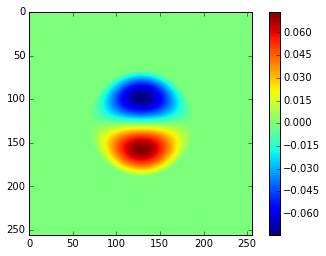

In [12]:
plt.imshow(m.q[0])
plt.colorbar()